# **PART A**

### Research question

Does people at risk of heart disease have high blood pressure? Therefore X will be sysBP the systolic blood pressure and the binary variable Y is TenYearCHD which tells whether the person has had a heart attack.

In [ ]:
# section 1 question 1
import random
import pandas as pd
import numpy as np
from scipy.stats import f, chi2
import numpy.linalg as ln
from statistics import median
df = pd.read_csv("framingham_heart_disease.csv") 
df =df.dropna()

data = df[["TenYearCHD","sysBP"]]
 # 200 random samples of x, and save all the other samples that not in thos 200 also 
data_200 = data.sample(n=200, random_state = 55) 
not_data_200 = data.drop(data_200.index)

data_200 = data_200.reset_index(drop = True)

not_data_200 = not_data_200.sample(n=1000, random_state = 55) 
not_data_200 = not_data_200.reset_index(drop = True)


In [ ]:
# section 1 question 2 intro

tau = median(data_200["sysBP"]) 

data_200['Z'] = np.where((data_200["sysBP"] > tau), 1, 0)
not_data_200['Z'] = np.where((not_data_200["sysBP"] > tau), 1, 0)

def eta(p):
  return np.log(p/(1-p))



In [ ]:
# section 1 question 2 a
from statistics import mean

def bootstrap_normal_se(df0,  B=400,  n=200, z=1.96):
    psi_arr = []
    for i in range(B):
        sample = np.zeros((n,2))
        for j in range(n):
          u = random.randint(0, n-1)
          sample[j] = df0[["TenYearCHD", "Z"]].loc[u]

        sample = pd.DataFrame(sample, columns=["TenYearCHD", "Z"])
        Y_0 = sample.loc[sample["TenYearCHD"]==0]["Z"]
        p0 = Y_0.sum()/len(Y_0)
        Y_1 = sample.loc[sample["TenYearCHD"]==1]["Z"]
        p1 = Y_1.sum()/len(Y_1)
        psi_arr.append(eta(p0)-eta(p1))
   
    curr_bootstrap_mean = mean(psi_arr)
    se = np.std(psi_arr)
    pivot_CI = (curr_bootstrap_mean - se*z,curr_bootstrap_mean + se*z)
    
    print("Psi estimator :", curr_bootstrap_mean)
    print("Confidence interval of psi, when s.e based on Bootstrap and Normal approximation: ", pivot_CI)

bootstrap_normal_se(data_200)

Psi estimator : -1.247632090746516
Confidence interval of psi, when s.e based on Bootstrap and Normal approximation:  (-2.2049725407542793, -0.29029164073875235)


In [ ]:
# section 1 question 2 b

def uniform_prior(df0,  B=400,  n=200):
    psi_arr = []

    Y_0 = df0.loc[df0["TenYearCHD"]==0]["Z"]
    s0 = Y_0.sum()
    m0 = len(Y_0)
    Y_1 = df0.loc[df0["TenYearCHD"]==1]["Z"]
    s1 = Y_1.sum()
    m1 = len(Y_1)
    
    for i in range(B):
        p0 = np.random.beta(s0+1,m0-s0+1)
        p1 = np.random.beta(s1+1,m1-s1+1)
        psi_arr.append(eta(p0)-eta(p1))
   
    psi_arr = sorted(psi_arr)
    q_low = np.quantile(psi_arr, 0.025)
    q_high = np.quantile(psi_arr, 0.975)
    CI = (q_low,q_high)

    print("Psi estimator :", mean(psi_arr))
    print("Credible interval of psi, when prior based on uniform prior: ", CI)

uniform_prior(data_200)

Psi estimator : -1.1770767810630545
Credible interval of psi, when prior based on uniform prior:  (-2.169982825445903, -0.2403141088234529)


In [ ]:
# section 1 question 2 c

def jeffreys_prior(df0,  B=400,  n=200):
    psi_arr = []
    Y_0 = df0.loc[df0["TenYearCHD"]==0]["Z"]
    s0 = Y_0.sum()
    m0 = len(Y_0)
    Y_1 = df0.loc[df0["TenYearCHD"]==1]["Z"]
    s1 = Y_1.sum()
    m1 = len(Y_1)

    for i in range(B):
        p0 = np.random.beta(s0+0.5,m0-s0+0.5)
        p1 = np.random.beta(s1+0.5,m1-s1+0.5)
        psi_arr.append(eta(p0)-eta(p1))
   
    psi_arr = sorted(psi_arr)
    q_low = np.quantile(psi_arr, 0.025)
    q_high = np.quantile(psi_arr, 0.975)
    CI = (q_low,q_high)

    print("Psi estimator :", mean(psi_arr))
    print("Credible interval of psi, when prior based on jeffreys prior: ", CI)

jeffreys_prior(data_200)

Psi estimator : -1.2329872637892119
Credible interval of psi, when prior based on jeffreys prior:  (-2.330734807389785, -0.32836868620485316)


In [ ]:
# section 1 question 2 d
from matplotlib import pyplot as plt

def beta_prior(df0,df1,  B=400,  n=1000):
    psi_arr = []

    Y_00 = df0.loc[df0["TenYearCHD"]==0]["Z"]
    s00 = Y_00.sum()
    m00 = len(Y_00)
    Y_01 = df0.loc[df0["TenYearCHD"]==1]["Z"]
    s01 = Y_01.sum()
    m01 = len(Y_01)

    Y_10 = df1.loc[df1["TenYearCHD"]==0]["Z"]
    s10 = Y_10.sum()
    m10 = len(Y_10)
    Y_11 = df1.loc[df1["TenYearCHD"]==1]["Z"]
    s11 = Y_11.sum()
    m11 = len(Y_11)

    for i in range(B):
        p0 = np.random.beta((s00+1)+s10,(m00-s00+1)+m10-s10)
        p1 = np.random.beta((s01+1)+s11,(m01-s01+1)+m11-s11)
        psi_arr.append(eta(p0)-eta(p1))
   
    psi_arr = sorted(psi_arr)
    q_low = np.quantile(psi_arr, 0.025)
    q_high = np.quantile(psi_arr, 0.975)
    CI = (q_low,q_high)

    print("Psi estimator :", mean(psi_arr))
    print("Credible interval of psi, when prior based on beta family: ", CI)
    print(f"Posterior distribution for Z=0: beta({(s00+1)+s10},{(m00-s00+1)+m10-s10}), and for Z=1 : beta({(s01+1)+s11},{(m01-s01+1)+m11-s11})")

beta_prior(not_data_200, data_200)

Psi estimator : -0.7939159369373787
Credible interval of psi, when prior based on beta family:  (-1.1616382097217068, -0.43456791343473805)
Posterior distribution for Z=0: beta(530,506), and for Z=1 : beta(117,51)


### section 1 question 2 e

It can be seen that when we relied on the uniform or Jeffrey's prior and the observed data, we got a significantly larger confidence interval and a smaller Psi estimator than section d in which we calculated both the prior and the posterior based on the past data and the observed data respectively, something that may arise due to the larger amount of data. In addition all the estimators we received for Psi is negative, therefore our conclusion is that P(𝑍 = 1|𝑌 = 0)  < P(𝑍 = 1|𝑌 = 1) 


# **PART B**

**age** (discrete variable, name in the data - Age), **cholesterol** (continuous variable, name in the data - totChol) and **cigarettes Per Day** (discrete variable, name in the data - cigsPerDay) on the explanatory variable **BMI** (continuous variable, name in the data - BMI)

In [ ]:
# section 2 q1
import pandas as pd
import numpy as np
import numpy.linalg as ln

df = pd.read_csv("framingham_heart_disease.csv") 
data = df[["age","totChol","cigsPerDay","BMI"]].dropna()
# 1000 random samples of x, and save all the other samples that not in thos 200 also 

data_1000 = data.sample(n=1000, random_state =1).reset_index(drop = True)
coef_dict  = {}

In [ ]:
# section 2 q2
import random
import pandas as pd
import numpy as np
from scipy.stats import f, chi2
import numpy.linalg as ln
from sklearn.linear_model import LinearRegression

data_1000.insert(0, 'b0', 1)

def beta_with_CI(df, with_null = False):
    y = df["BMI"]
    x = df[['b0', "age","totChol","cigsPerDay"]]
    
    model = LinearRegression()
    model.fit(x, y)

    print('bias :',model.intercept_,', Coefficients (age, totChol, cigsPerDay):', model.coef_[1:])
    b_ols = [model.intercept_, model.coef_[1], model.coef_[2], model.coef_[3]]

    C = ln.inv(np.dot(np.transpose(x),x))
    z = 2
    e_square = np.dot(np.transpose(y-np.dot(x,b_ols)),y-np.dot(x,b_ols))
    res_var_est = e_square/(len(y)-4)
    C=ln.inv(np.dot(np.transpose(x),x))
    CIn = []
    for i in range(len(C)):
      res_se_est = np.sqrt(res_var_est*C[i][i])
      interval = z*res_se_est
      CI = (b_ols[i]-interval,b_ols[i]+interval)
      CIn.append(CI) 
      if not with_null:
         print("",i ,"Confidence interval of beta, s.e based on variance matrix, full data: [",CI,"]")
      else:
         print("",i ,"Confidence interval of beta, s.e based on variance matrix, full partial: [",CI,"]") 
    return (CIn, b_ols)
coef_dict['2'] = beta_with_CI(data_1000)

bias : 22.868749039534435 , Coefficients (age, totChol, cigsPerDay): [ 0.04896261  0.00311574 -0.01463124]
 0 Confidence interval of beta, s.e based on variance matrix, full data: [ (21.053875692455826, 24.683622386613045) ]
 1 Confidence interval of beta, s.e based on variance matrix, full data: [ (0.01724839622147859, 0.08067682739223905) ]
 2 Confidence interval of beta, s.e based on variance matrix, full data: [ (-0.0028282798314465934, 0.009059761607729104) ]
 3 Confidence interval of beta, s.e based on variance matrix, full data: [ (-0.036011952624926014, 0.006749476262309775) ]


In [ ]:
# section 2 q3
import random
new_data_1000 = data_1000.sort_values('BMI').reset_index(drop = True)
new_data_1000['probability'] = (new_data_1000['BMI'].index+1) / 1000
count=0
while count<500:
  for i, row in new_data_1000.iterrows():
    p = row._get_value(5, 'probability')
    res = np.random.binomial(1, p)
    if res==1 and count<500:
      new_data_1000.iloc[i,[4]] = np.NaN
      count+=1

In [ ]:
# section 2 q4 a

new_data_1000_a = new_data_1000.dropna()
coef_dict['4a'] = beta_with_CI(new_data_1000_a)

bias : 21.955385496063574 , Coefficients (age, totChol, cigsPerDay): [-0.00062013  0.00944618 -0.03090314]
 0 Confidence interval of beta, s.e based on variance matrix, full data: [ (20.180635722672594, 23.730135269454554) ]
 1 Confidence interval of beta, s.e based on variance matrix, full data: [ (-0.03385091440963135, 0.03261065787427213) ]
 2 Confidence interval of beta, s.e based on variance matrix, full data: [ (0.0033866406015869077, 0.015505725200448909) ]
 3 Confidence interval of beta, s.e based on variance matrix, full data: [ (-0.05468236251690214, -0.007123917426039218) ]


In [ ]:
# section 2 q4 b
from sklearn.linear_model import LinearRegression

def beta_with_regression_imputation(df):
    df = df.copy()
    w_0 = df[df["BMI"].isna()][['b0', 'age', 'totChol', 'cigsPerDay']]    
    w_1 = df[df["BMI"].notnull()][['b0', "age","totChol","cigsPerDay"]]
    y_1 = df[df["BMI"].notnull()]["BMI"]

    
    model = LinearRegression()
    model.fit(w_1, y_1)

    RI_values = model.predict(w_0)
    
    df.loc[df["BMI"].isna(),"BMI"] = RI_values
    
    y = df["BMI"]
    x = df[['b0', "age","totChol","cigsPerDay"]]

    model.fit(x, y)

    print('bias :',model.intercept_,', Coefficients (age, totChol, cigsPerDay):', model.coef_[1:])
    b_ols = [model.intercept_, model.coef_[1], model.coef_[2], model.coef_[3]]
    C = ln.inv(np.dot(np.transpose(x),x))
    z = 1.96
    e_square = np.dot(np.transpose(y-np.dot(x,b_ols)),y-np.dot(x,b_ols))
    res_var_est = e_square/(len(y)-4)
    C=ln.inv(np.dot(np.transpose(x),x))
    CIn = []
    for i in range(len(C)):
      res_se_est = np.sqrt(res_var_est*C[i][i])
      interval = z*res_se_est
      CI = (b_ols[i]-interval,b_ols[i]+interval)
      CIn.append(CI) 
      print("",i ,"Confidence interval of beta, based on regression imputation: [",CI,"]")
    return (CIn, b_ols)
coef_dict['4b'] = beta_with_regression_imputation(new_data_1000)



bias : 21.955385496063577 , Coefficients (age, totChol, cigsPerDay): [-0.00062013  0.00944618 -0.03090314]
 0 Confidence interval of beta, based on regression imputation: [ (21.058580005858662, 22.852190986268493) ]
 1 Confidence interval of beta, based on regression imputation: [ (-0.016291460209543918, 0.015051203674184811) ]
 2 Confidence interval of beta, based on regression imputation: [ (0.006508991485540427, 0.01238337431649537) ]
 3 Confidence interval of beta, based on regression imputation: [ (-0.04146825302930744, -0.020338026913633976) ]


### section 2 q4 b continue-
The result is not different from the previous section, because we completed the missing values with values from the regression line

In [ ]:
# section 2 q4 c
def beta_with_multiple_imputation(df, M=200):
    df = df.copy()
    w_0 = df[df["BMI"].isna()][['b0', 'age', 'totChol', 'cigsPerDay']]    
    w_1 = df[df["BMI"].notnull()][['b0', "age","totChol","cigsPerDay"]]
    y_1 = df[df["BMI"].notnull()]["BMI"]
    x = df[['b0', "age","totChol","cigsPerDay"]]

    
    model = LinearRegression()
    model.fit(w_1, y_1)
    beta_R1 = [model.intercept_, model.coef_[1], model.coef_[2], model.coef_[3]]

    e_square_comlete_data = np.dot(np.transpose(y_1-np.dot(w_1,beta_R1)),y_1-np.dot(w_1,beta_R1))
    se_est_comlete_data = np.sqrt(e_square_comlete_data/(len(y_1)-4))
    miu = []
    RI_values = model.predict(w_0)
    RI_values = np.array(RI_values)

    for i in range(M):
      df_copy = df.copy()
      count = 0
      for i, row in df_copy[df_copy["BMI"].isna()].iterrows():
        y_im = np.random.normal(loc=RI_values[count], scale=se_est_comlete_data)
        df_copy.iloc[i,[4]] = y_im
        count += 1

      y_m = df_copy["BMI"]
      model.fit(x, y_m)
      beta_m = [model.intercept_, model.coef_[1], model.coef_[2], model.coef_[3]]
      miu.append(beta_m)

    miu = np.array(miu)
    miu_MI = np.average(miu, axis = 0)

    df.loc[df["BMI"].isna(),"BMI"] = np.dot(w_0, miu_MI)

    y = df["BMI"]

    model.fit(x, y)

    print('bias :',model.intercept_,', Coefficients (age, totChol, cigsPerDay):', model.coef_[1:])
    b_ols = [model.intercept_, model.coef_[1], model.coef_[2], model.coef_[3]]
    C = ln.inv(np.dot(np.transpose(x),x))
    z = 1.96
    e_square = np.dot(np.transpose(y-np.dot(x,b_ols)),y-np.dot(x,b_ols))
    res_var_est = e_square/(len(y)-4)
    C=ln.inv(np.dot(np.transpose(x),x))
    CIn = []
    for i in range(len(C)):
      res_se_est = np.sqrt(res_var_est*C[i][i])
      interval = z*res_se_est
      CI = (b_ols[i]-interval,b_ols[i]+interval)
      CIn.append(CI) 
      print("",i ,"Confidence interval of beta, based on multiple imputation: [",CI,"]")
    
    return miu, miu_MI, (CIn, b_ols)
miu, miu_MI, coef_dict['4c'] = beta_with_multiple_imputation(new_data_1000)

bias : 21.962621241037418 , Coefficients (age, totChol, cigsPerDay): [-0.00054999  0.00940873 -0.03102419]
 0 Confidence interval of beta, based on multiple imputation: [ (21.065815205650413, 22.859427276424423) ]
 1 Confidence interval of beta, based on multiple imputation: [ (-0.01622133122978404, 0.015121351707640385) ]
 2 Confidence interval of beta, based on multiple imputation: [ (0.006471536127716171, 0.012345922529800338) ]
 3 Confidence interval of beta, based on multiple imputation: [ (-0.04158930781779174, -0.020459068856723255) ]


In [ ]:
# section 2 q4 d
def rubin_se(df, miu_MI , miu_list, M=200):
    x = df[['b0', "age","totChol","cigsPerDay"]]

    C = ln.inv(np.dot(np.transpose(x),x))
    z = 1.96
    C=ln.inv(np.dot(np.transpose(x),x))
    CIn = []
    for i in range(len(C)):
      res_se_est = np.sqrt((1/M)*M*C[i][i] + (M+1)/(M*(M-1))*np.sum(np.power(miu_list-miu_MI,2)))
      interval = z*res_se_est
      CI = (miu_MI[i]-interval,miu_MI[i]+interval)
      CIn.append(CI) 
      print("",i ,"Confidence interval of beta, rubin s.e and multiple imputation: [",CI,"]")
    return (CIn, [])
coef_dict['4d'] = rubin_se(new_data_1000, miu_MI , miu, M=200)

 0 Confidence interval of beta, rubin s.e and multiple imputation: [ (21.042004764028377, 22.903017087452326) ]
 1 Confidence interval of beta, rubin s.e and multiple imputation: [ (-0.814661713543508, 0.8136053616876887) ]
 2 Confidence interval of beta, rubin s.e and multiple imputation: [ (-0.8047274007826589, 0.8234661742680675) ]
 3 Confidence interval of beta, rubin s.e and multiple imputation: [ (-0.8452268391789648, 0.7829986826095534) ]


In [ ]:
# section 2 q4 e
from sklearn.linear_model import LogisticRegression

df_e = new_data_1000.copy()
df_e['R'] = np.where((df_e["BMI"].notna()), 1, -1)

W = df_e[['b0', "age","totChol","cigsPerDay"]]
R = df_e['R']

log_reg = LogisticRegression()
log_reg.fit(W, R)

#Use the model to predict the probability of R = 1 given the explanatory variables
probability = log_reg.predict_proba(W)[:, 1]

print("Probability of R = 1 given b0, age, totChol, cigsPerDay:", probability)

Probability of R = 1 given b0, age, totChol, cigsPerDay: [0.5881655  0.61248909 0.53425676 0.53620896 0.38706794 0.54137107
 0.53065271 0.44813037 0.56109269 0.45935877 0.53447801 0.44049166
 0.50521562 0.57949319 0.47000593 0.47801238 0.53101518 0.55872806
 0.53990295 0.43001949 0.54229497 0.5876132  0.37092904 0.53597755
 0.39380032 0.57593616 0.60800377 0.54527676 0.47539001 0.44144727
 0.55489456 0.4343549  0.51252739 0.53522786 0.5210719  0.50806466
 0.55526674 0.51673105 0.48433398 0.55357065 0.45235803 0.58266629
 0.48417967 0.60781642 0.39546198 0.56278278 0.44123133 0.4246024
 0.5094493  0.55659246 0.52705131 0.56830535 0.54387095 0.49975728
 0.41635413 0.4144491  0.46406181 0.47161066 0.52146085 0.3693075
 0.55397951 0.51753856 0.52829796 0.51131965 0.52725342 0.47266388
 0.41895754 0.47754291 0.48005657 0.5470425  0.56908589 0.53680406
 0.57486253 0.56390431 0.51211735 0.45389017 0.57715331 0.56919615
 0.46136555 0.50572717 0.54371436 0.49484716 0.57778802 0.538975
 0.548022

### section 2 q4 f
Linear regression as a least squares problem

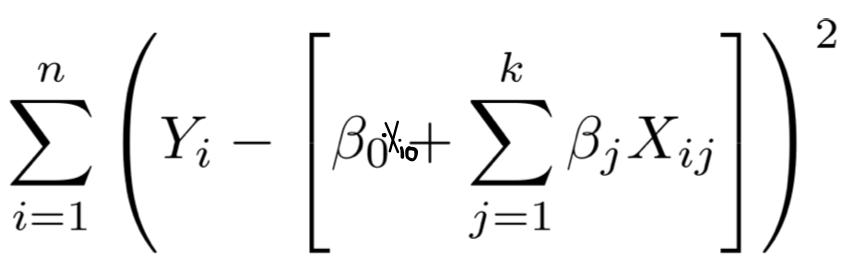


In [ ]:
# section 2 q4 f continued
from sklearn.utils import resample
probability_R1 = np.delete(probability, np.where(R == -1))
w_1 = new_data_1000[new_data_1000["BMI"].notnull()][['b0', "age","totChol","cigsPerDay"]].to_numpy()
y_1 = new_data_1000[new_data_1000["BMI"].notnull()]["BMI"].to_numpy()

V1 = np.array([(y_1[i] / probability_R1[i]) for i in range(len(w_1))])
V = np.diag(V1)
# Calculate the IPW estimator for the regression coefficients
beta_IPW = ln.inv(w_1.T@V@w_1)@w_1.T@V@y_1

print('bias :',beta_IPW[0],', Coefficients (age, totChol, cigsPerDay):', beta_IPW[1], beta_IPW[2], beta_IPW[3])


bias : 22.18149321008471 , Coefficients (age, totChol, cigsPerDay): 0.003956128253022238 0.008863561880991851 -0.028947461676086333


In [ ]:
from statistics import mean
# section 2 q4 g
# Set the number of bootstrap samples
B = 400

beta_bootstrap = []
new_full_data = new_data_1000[new_data_1000["BMI"].notnull()][['b0', "age","totChol","cigsPerDay","BMI"]].copy()
new_full_data['prob1'] = probability_R1.copy()

# Perform bootstrap resampling
for i in range(B):
  
    data = new_full_data.sample(n = len(new_full_data), replace = True)
    Xs = data[data["BMI"].notnull()][['b0', "age","totChol","cigsPerDay"]].to_numpy()
    ys = data[data["BMI"].notnull()]["BMI"].to_numpy()
    ps = data["prob1"].to_numpy()
    v1 = np.array([(ys[i] / ps[i]) for i in range(len(Xs))])
    v = np.diag(V1)
    betai_IPW = ln.inv(Xs.T@v@Xs)@Xs.T@v@ys
    beta_bootstrap.append(betai_IPW)

CIs = []
beta_ipw_std = np.std(beta_bootstrap,axis = 0)
beta_ipw_mean = np.mean(beta_bootstrap,axis = 0)

for i in range(4):
      z=1.96
      pivot_CI = (beta_ipw_mean[i] - beta_ipw_std[i]*z,beta_ipw_mean[i] + beta_ipw_std[i]*z)
      CIs.append(pivot_CI)
      print("",i ,"Confidence interval of beta, bootstrap of IPW betas: [",pivot_CI,"]")
coef_dict['4g'] = (CIs, list(beta_IPW))


 0 Confidence interval of beta, bootstrap of IPW betas: [ (20.09504783767296, 23.859059748584773) ]
 1 Confidence interval of beta, bootstrap of IPW betas: [ (-0.03214841802428434, 0.028948159578239204) ]
 2 Confidence interval of beta, bootstrap of IPW betas: [ (0.0030475143019075843, 0.01619598436986298) ]
 3 Confidence interval of beta, bootstrap of IPW betas: [ (-0.05386554335129087, -0.009859966674677745) ]


### i
We accepted that in relation to the estimator obtained from all the data in section 2, the three estimators regression imputation, multiple imputation in both variations were relatively the same, while the IPW estimator received the closest values to section 2, furthermore the values from section 2 were at the edge of the confidence intervals in these three estimators Therefore in total we accepted that the IPW estimator was the best even though the data was downloaded relatively randomly

In [ ]:
import matplotlib.pyplot as plt

n_coef = len(coef_dict['4a'][0])
coef_list = [(key,value[0]) for key,value in coef_dict.items()]
keys_list = [ key[0] for key in coef_list]

for key, value in coef_dict.items():
  if len(value[1]) > 0:
    print(f"section : {key}, coefficients : {value[1]}")

section : 2, coefficients : [22.868749039534435, 0.04896261180685882, 0.0031157408881412555, -0.014631238181308119]
section : 4a, coefficients : [21.955385496063574, -0.0006201282676796143, 0.009446182901017909, -0.030903139971470678]
section : 4b, coefficients : [21.955385496063577, -0.000620128267679554, 0.009446182901017898, -0.03090313997147071]
section : 4c, coefficients : [21.962621241037418, -0.000549989761071827, 0.009408729328758254, -0.031024188337257497]
section : 4g, coefficients : [22.18149321008471, 0.003956128253022238, 0.008863561880991851, -0.028947461676086333]


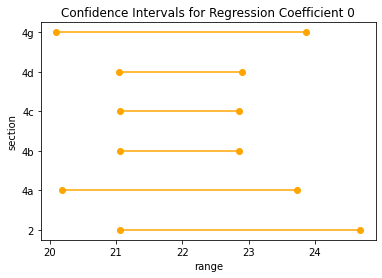

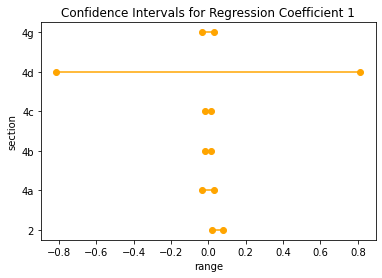

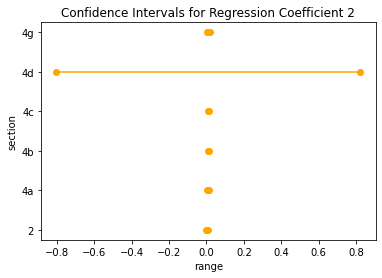

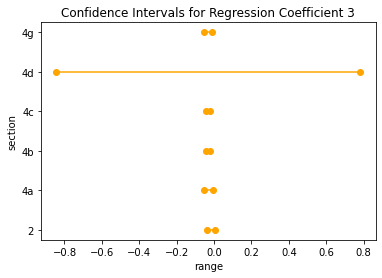

In [ ]:
# Plot the confidence intervals
for i in range(n_coef):
    # Create a figure and axes
    fig, ax = plt.subplots()
    for j in range(6):
      plt.plot((coef_list[j][1][i][0],coef_list[j][1][i][1]),(j,j),'ro-',color='orange')
    plt.yticks(range(6),keys_list)
    ax.set_ylabel('section')
    ax.set_xlabel('range')
    ax.set_title(f'Confidence Intervals for Regression Coefficient {i}')
    plt.show()
    print()

### ii
similar to i, the values from section 2 were at the edge of the confidence intervals in the regression and multiple imputation,and in about thw middle of IPW, Therefore in total we accepted that the IPW estimator was the best' allthow the null samples chosed about randomly